In [1045]:
import numpy as np
import math

# sigmoidal function
def activation(x):
    return 1 / (1 + math.exp(-x))

inputs = np.array([1, 2, 3, 4])
weights = np.array([0.2, 0.324, 0.1, .001])
bias = 1.5

a = activation(np.dot(inputs.T, weights) + bias)

a

0.9341341524806636

In [10]:
# https://deeplearning4j.org/restrictedboltzmannmachine
# http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py
# http://scikit-learn.org/stable/modules/neural_networks_unsupervised.html#rbm
  
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

In [1086]:
# create numpy array from csv
images = np.genfromtxt('../data/mnist_train.csv', delimiter=',')

In [1087]:
# 6000 images and 785 columns, 28X28 pixels + 1 response
images.shape

(6000, 785)

In [1088]:
# extract the X and y variable
images_X, images_y = images[:,1:], images[:,0]

# values are much larger than 0-1 but scikit-learn RBM version assumes 0-1 scaling
np.min(images_X), np.max(images_X)

(0.0, 255.0)

5.0

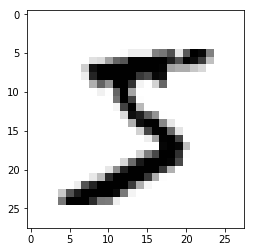

In [1089]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

In [1090]:
# scale images_X to be beteen 0 and 1
images_X = images_X / 255.

# make pixels binary (either white or black)
images_X = (images_X > 0.5).astype(float)

np.min(images_X), np.max(images_X)

(0.0, 1.0)

5.0

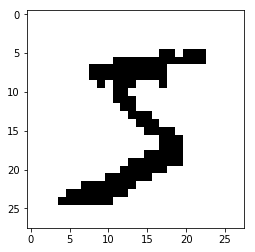

In [1091]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

In [11]:
# import Principal Components Analysis module
from sklearn.decomposition import PCA

# extract 100 "eigen-digits"
pca = PCA(n_components=100)
pca.fit(images_X)

# graph the 100 components
plt.figure(figsize=(10, 10))
for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by PCA')

plt.show()

NameError: name 'images_X' is not defined

In [1093]:
# first 30 components explain 64% of the variance

pca.explained_variance_ratio_[:30].sum()

0.63741414092585647

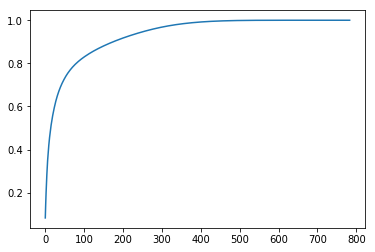

In [1094]:
# Scree Plot

# extract all "eigen-digits"
full_pca = PCA(n_components=784)
full_pca.fit(images_X)

plt.plot(np.cumsum(full_pca.explained_variance_ratio_))

# 100 components captures about 90% of the variance

In [1095]:
# Use pca to transform the first image
pca.transform(images_X[:1])

array([[ 0.61090568,  1.36377972,  0.42170385, -2.19662828, -0.45181077,
        -1.320495  ,  0.79434677,  0.30551126,  1.22978985, -0.72096767,
         0.08168354, -1.91375569, -2.54647369, -1.62440544,  0.6710732 ,
         0.15635607,  0.91831072, -0.18981322,  1.30141269,  1.5792965 ,
         0.99053257,  0.1128206 ,  1.07342875,  0.70139358, -0.35904893,
         0.16657888,  0.99307049, -0.73122311,  0.86968171, -0.18626405,
        -0.72496002,  0.11266931,  0.16110941,  0.07320721,  0.11756262,
        -0.73035757, -0.29682406,  0.17259969,  0.29929953,  2.32479538,
        -0.20423799, -0.85436756,  0.67606723,  0.34982893,  0.34040192,
        -0.42172895, -0.20758526,  0.39230341, -0.31924303,  0.38596704,
         0.06588435,  0.07831022,  0.62769185,  0.79467082, -0.41554058,
         0.02468346, -0.17790545,  0.15665044, -0.52931346, -0.37273314,
        -0.4084621 , -0.476576  ,  0.47640142,  0.30306302,  0.45688108,
         0.66563001, -0.73098281, -0.37502792, -0.1

In [1096]:
# reminder that transformation is a matrix multiplication away
np.dot(images_X[:1]-images_X.mean(axis=0), pca.components_.T)

array([[ 0.61090568,  1.36377972,  0.42170385, -2.19662828, -0.45181077,
        -1.320495  ,  0.79434677,  0.30551126,  1.22978985, -0.72096767,
         0.08168354, -1.91375569, -2.54647369, -1.62440544,  0.6710732 ,
         0.15635607,  0.91831072, -0.18981322,  1.30141269,  1.5792965 ,
         0.99053257,  0.1128206 ,  1.07342875,  0.70139358, -0.35904893,
         0.16657888,  0.99307049, -0.73122311,  0.86968171, -0.18626405,
        -0.72496002,  0.11266931,  0.16110941,  0.07320721,  0.11756262,
        -0.73035757, -0.29682406,  0.17259969,  0.29929953,  2.32479538,
        -0.20423799, -0.85436756,  0.67606723,  0.34982893,  0.34040192,
        -0.42172895, -0.20758526,  0.39230341, -0.31924303,  0.38596704,
         0.06588435,  0.07831022,  0.62769185,  0.79467082, -0.41554058,
         0.02468346, -0.17790545,  0.15665044, -0.52931346, -0.37273314,
        -0.4084621 , -0.476576  ,  0.47640142,  0.30306302,  0.45688108,
         0.66563001, -0.73098281, -0.37502792, -0.1

In [1097]:
# instantiate our BernoulliRBM
# we set a random_state to initialize our weights and biases to the same starting point
# verbose is set to True to see the fitting period
# n_iter is the number of back and forth passes
# n_components (like PCA and LDA) represent the number of features to create
# n_components can be any integer, less than , equal to, or greater than the original number of features
rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)

In [1098]:
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -138.59, time = 0.77s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -120.25, time = 0.88s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -116.46, time = 1.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -117.89, time = 0.98s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -107.14, time = 0.95s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -120.01, time = 1.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -115.52, time = 0.89s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -115.05, time = 1.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -110.50, time = 0.86s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -114.53, time = 0.94s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -111.64, time = 0.87s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -104.67, time = 0.96s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -110.51, time = 0.92s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -114.16, time = 1.00s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=20,
       random_state=0, verbose=True)

In [1099]:
# RBM also has components_ attribute
len(rbm.components_)

100

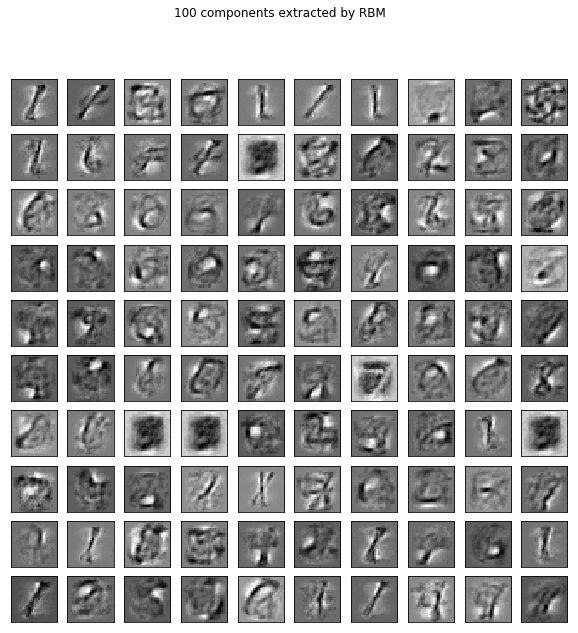

In [1103]:
# plot the RBM components (representations of the new feature sets)
plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM')

plt.show()

In [720]:
# It looks like many of these components are exactly the same but

# this shows that all components are actually different (albiet some very slightly) from one another
np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [698]:
# Use our Boltzman Machine to transform a single image of a 5
image_new_features = rbm.transform(images_X[:1]).reshape(100,)

image_new_features

array([  2.50169424e-16,   7.19295737e-16,   2.45862898e-09,
         4.48783657e-01,   1.64530318e-16,   5.96184335e-15,
         4.60051698e-20,   1.78646959e-08,   2.78104276e-23,
         2.70813812e-13,   2.50940115e-09,   4.64170958e-08,
         1.07072567e-26,   1.10680174e-16,   1.00000000e+00,
         9.99905149e-01,   1.15426798e-15,   2.95218989e-13,
         8.06464218e-01,   1.38496139e-08,   1.71628989e-11,
         9.99969969e-01,   5.83464768e-14,   1.09695359e-08,
         6.86681273e-15,   3.46562188e-15,   8.75233987e-05,
         2.12859792e-04,   9.16157022e-01,   9.99999807e-01,
         7.95301283e-05,   1.70252791e-07,   5.17798858e-09,
         3.54523000e-06,   9.99650403e-01,   7.47507624e-22,
         2.69805584e-15,   1.22830811e-11,   3.45242865e-04,
         4.76854052e-11,   1.51174443e-16,   5.08681630e-03,
         2.83209573e-13,   5.92457176e-15,   2.52562041e-04,
         9.99948935e-01,   1.70521382e-08,   5.61417536e-10,
         5.61926793e-04,

In [699]:
# not the same as a simple matrix multiplication anymore
# uses neural archtecture (several matrix operations) to transform features
np.dot(images_X[:1]-images_X.mean(axis=0), rbm.components_.T)

array([[ -3.60557365, -10.30403384,  -6.94375031,  14.10772267,
         -6.68343281,  -5.72754674,  -7.26618457, -26.32300164,
        -24.11774149, -18.67952087,   6.10272237,  14.83958801,
        -28.42454468, -10.35128566,   7.97033698,  13.96750969,
         -4.79677995,  -0.66323245,  20.15162602,   0.23806255,
        -12.42779368,  24.65404097, -17.57020122,   2.45270491,
         -2.05250317,  -3.79514652,   3.55526951,  14.56017923,
         23.36016941,  10.19071174,   6.39751085,  -4.63341997,
        -15.5352034 ,  10.69335197,  28.67169013, -23.74944911,
        -17.07275874,  11.09701411,  -2.62772473, -39.49640457,
        -25.18913046,  10.42681044,  -9.35283761, -19.99213925,
          1.19589126,  19.71423107,   3.31097993,  -4.45108205,
         -0.36553647,  23.13249556, -26.45471059, -15.46480853,
         -9.29704695, -15.63050117,  -9.16596051,   0.79124823,
          8.31408697, -13.18476147,   2.90771497,   7.37111982,
         -1.6743953 ,   1.13937293,   7.

In [1132]:
# get the most represented features
top_features = image_new_features.argsort()[-20:][::-1]

print top_features
image_new_features[top_features]

[56 63 62 14 69 83 82 49 92 29 21 45 15 34 28 94 18  3 79 58]


array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.99999999,  0.99999996,  0.99999981,
        0.99996997,  0.99994894,  0.99990515,  0.9996504 ,  0.91615702,
        0.86480507,  0.80646422,  0.44878366,  0.02906352,  0.01457827])

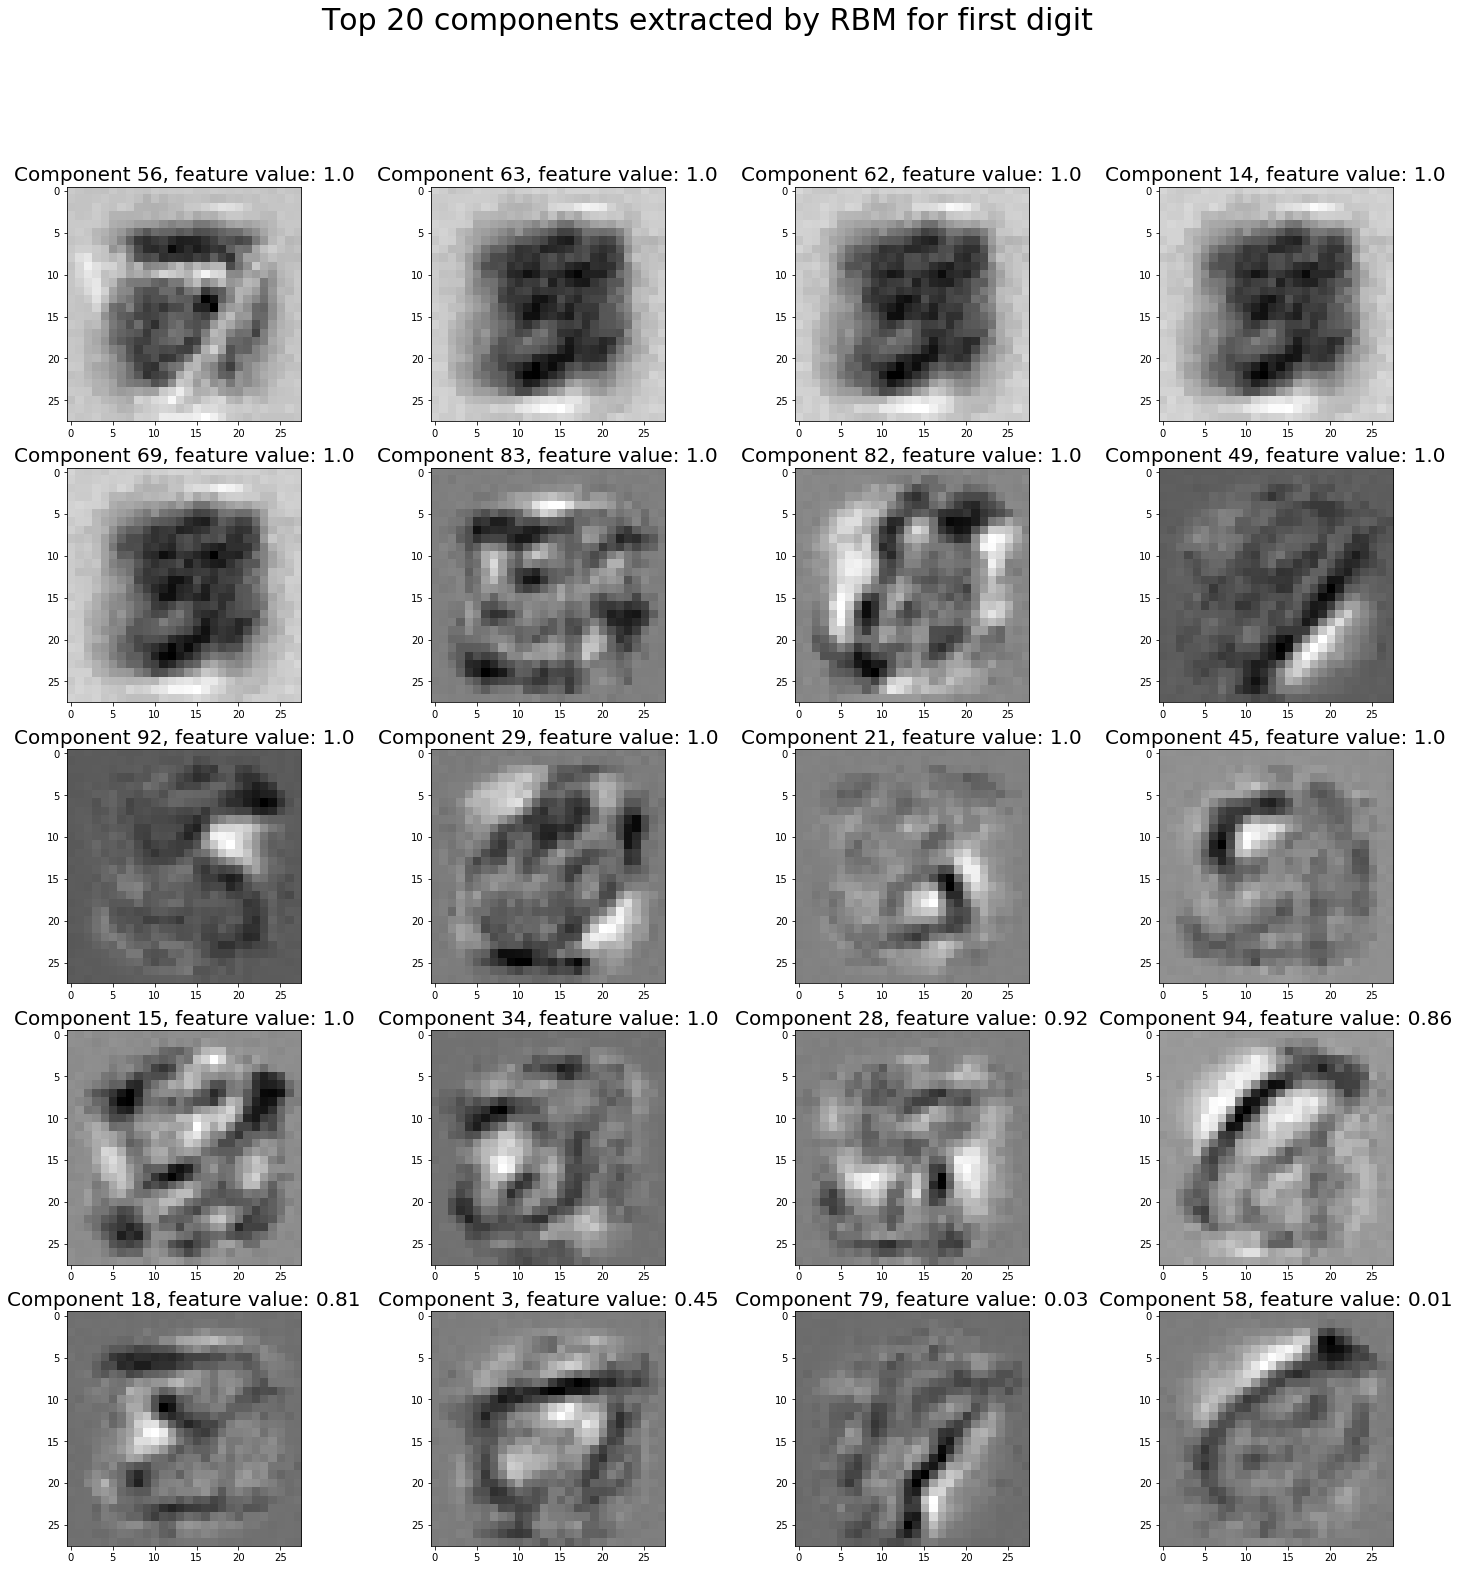

In [1141]:
# plot the RBM components (representations of the new feature sets) for the most represented features
plt.figure(figsize=(25, 25))
for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

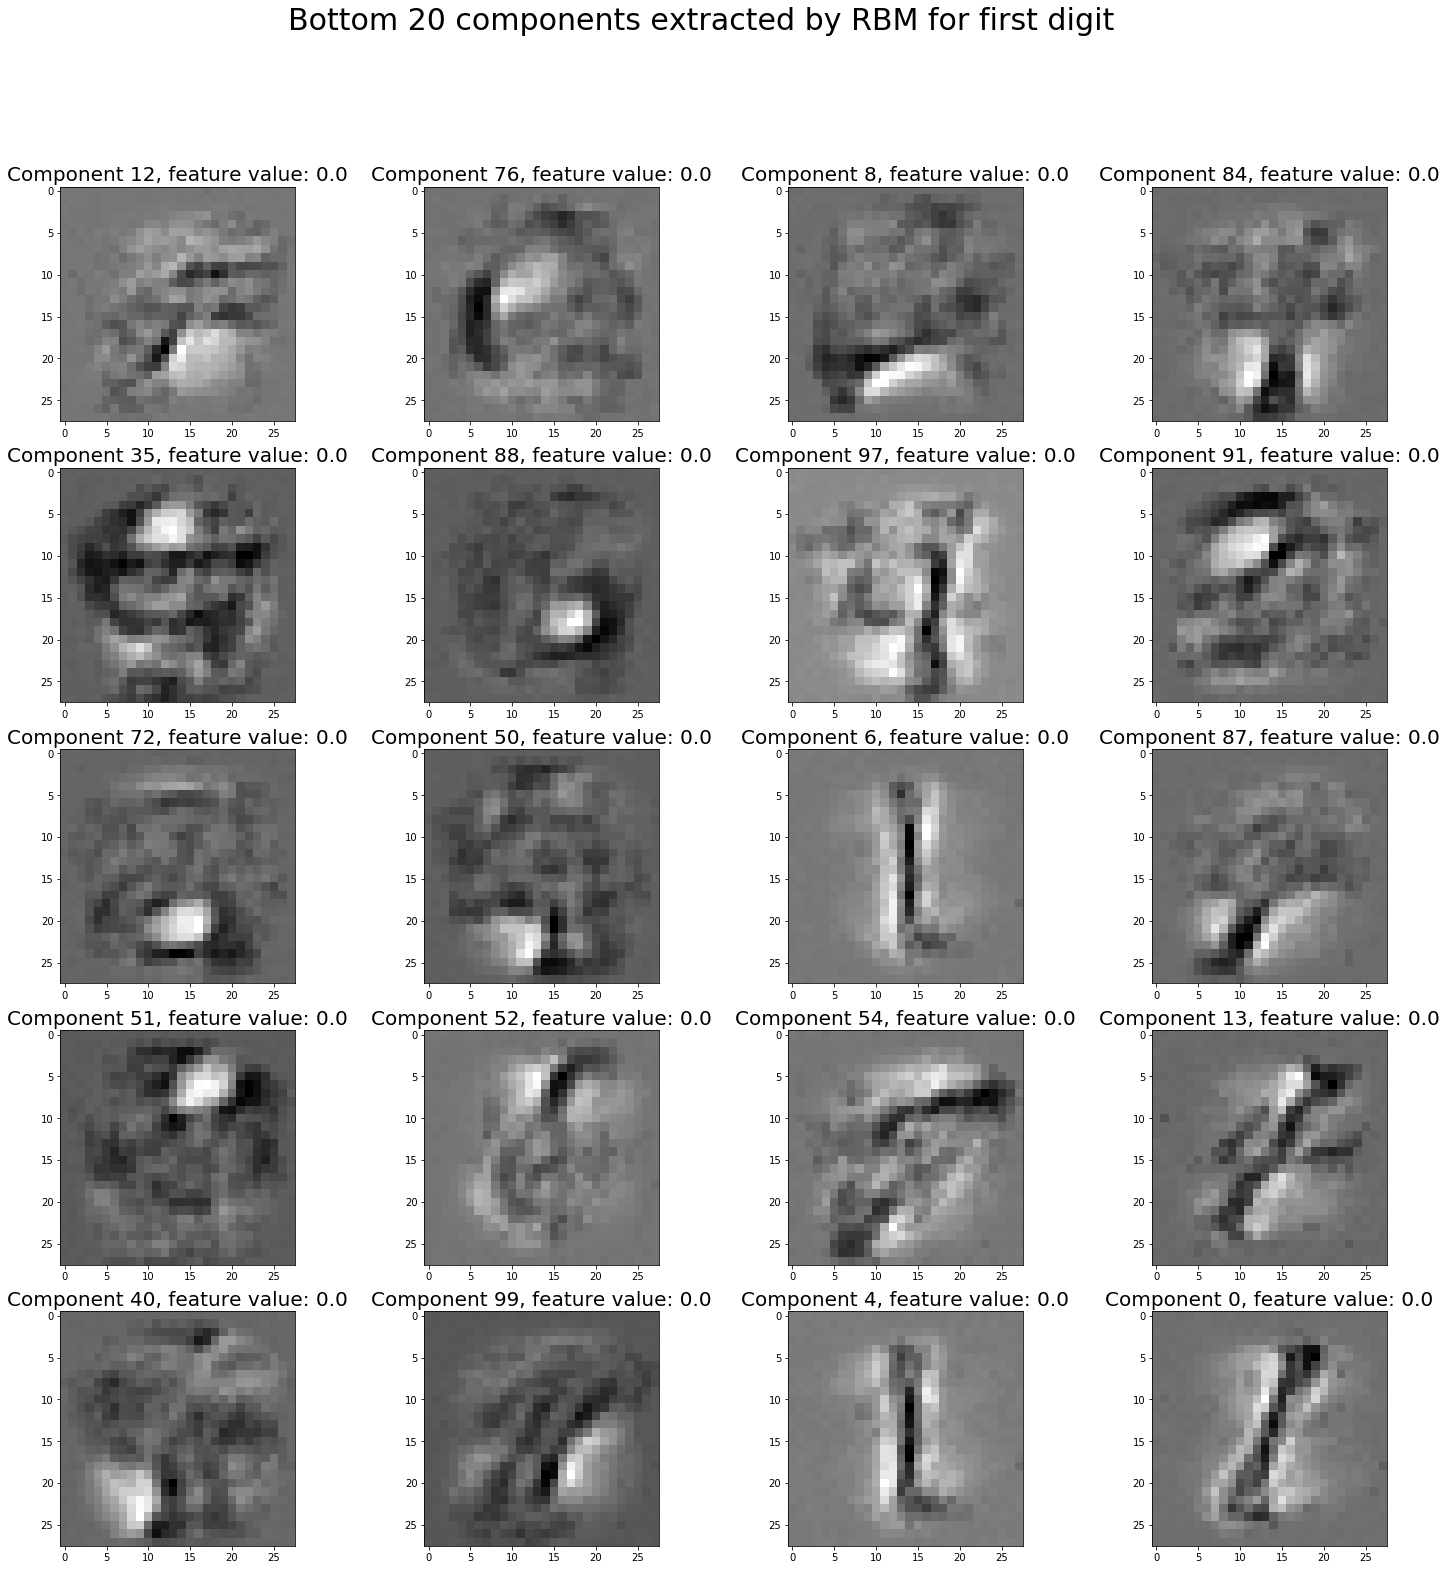

In [1140]:
# grab the least represented features
bottom_features = image_new_features.argsort()[:20]

plt.figure(figsize=(25, 25))
for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

In [593]:
# import logistic regression and gridsearch module for some machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# create our logistic regression
lr = LogisticRegression()
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

# instantiate a gridsearh class
grid = GridSearchCV(lr, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

({'C': 0.1}, 0.88749999999999996)

In [594]:
# Use PCA to extract new features

lr = LogisticRegression()
pca = PCA()

params = {'clf__C':[1e-1, 1e0, 1e1],
         'pca__n_components': [10, 100, 200]}

# create our pipeline
pipeline = Pipeline([('pca', pca), ('clf', lr)])

# instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

({'clf__C': 1.0, 'pca__n_components': 100}, 0.88949999999999996)

In [1148]:
# Use the RBM to learn new features

rbm = BernoulliRBM(random_state=0)

params = {'clf__C':[1e-1, 1e0, 1e1],
          'rbm__n_components': [100, 200]
         }

# create our pipeline
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])

# instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# fit to our data
grid.fit(images_X, images_y)

# check the best params
grid.best_params_, grid.best_score_

({'clf__C': 1.0, 'rbm__n_components': 200}, 0.91766666666666663)

In [13]:
# https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
# https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/
# http://deeplearning.net/tutorial/lenet.html
from glob import glob
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [14]:
import os
import random
from shutil import copyfile

base = "/Users/sinanozdemir/Dropbox/CODE/personal_code"
folder = '101/*'
training_folder = 'neural_images_train'
testing_folder = 'neural_images_test'

directory = os.path.join(base, folder)

# training folder
obj_training = os.path.join(base, training_folder)
# testing folder
obj_testing = os.path.join(base, testing_folder)

In [15]:
try:
    os.mkdir(obj_training)
    os.mkdir(obj_testing)
except:
    pass

split = .8
for folder in glob(directory):
    name_of_obj = folder.split('/')[-1]
    if name_of_obj not in ('stop_sign', 'octopus', 'accordion', 'butterfly'):
        continue
    print name_of_obj
    try:
        os.mkdir(os.path.join(os.path.join(obj_training, name_of_obj)))
    except:
        pass
    try:
        os.mkdir(os.path.join(os.path.join(obj_testing, name_of_obj)))
    except:
        pass
    for pic in glob(folder+'/*'):
        # pick a random number to assign to training and testing set
        rand = random.uniform(0, 1)  
        name = pic.split('/')[-1]
        if rand < split:
            copyfile(pic, os.path.join(os.path.join(obj_training, name_of_obj), name))
        else:
            copyfile(pic, os.path.join(os.path.join(obj_testing, name_of_obj), name))

butterfly
accordion
octopus
stop_sign


In [16]:
# pick a standard size to resize all images
# we will use 64x64 pixels
size_to_use = (64, 64)

In [721]:
# this is the augmentation configuration we will use for training
# https://keras.io/preprocessing/image/

# keras module for easily obtaining image batches
train_datagen = ImageDataGenerator(
        # scale all pixels to be between 0 and 1 like we did for RBM
        rescale=1./255,  
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        obj_training,  # this is the target directory
        target_size=size_to_use,  # all images will be resized to 32x32
        batch_size=2,  # 2 batches equal an epoch
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        obj_testing,
        target_size=size_to_use,
        batch_size=2,  # 2 batches equal an epoch
        class_mode='categorical')

Found 245 images belonging to 4 classes.
Found 232 images belonging to 4 classes.


In [722]:
# dictionary to turn codes into human readable strings
code_to_target = {v: k for k, v in train_generator.class_indices.iteritems()}

# example
code_to_target[0]

'accordion'

In [723]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(64, 64, 3), use_bias=True))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3), padding='valid', use_bias=True))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='valid', use_bias=True))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
# final output layer
model.add(Dense(len(code_to_target)))
model.add(Activation('softmax'))
# Compile model

epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 64)        0         
__________

In [724]:
checkpointer = ModelCheckpoint(filepath="new_weights.hdf5", verbose=1, save_best_only=True)

In [997]:
# Fit the model
model.fit_generator(
        train_generator,
        samples_per_epoch=train_generator.n,
        initial_epoch=0,
        nb_epoch=20,
        validation_data=validation_generator,
        nb_val_samples=validation_generator.n, 
        callbacks=[checkpointer])

/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., initial_epoch=0, validation_data=<keras.pre..., steps_per_epoch=122, epochs=100, callbacks=[<keras.ca..., validation_steps=232)`
  if __name__ == '__main__':


Epoch 1/100
  7/122 [>.............................] - ETA: 45s - loss: 2.1085 - acc: 0.7143

KeyboardInterrupt: 

In [998]:
# load previous version of the model
model.load_weights("new_weights.hdf5")

/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if __name__ == '__main__':
/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<keras.pre..., steps=1)`
  if __name__ == '__main__':


[[  8.89527769e-07   3.31979652e-04   2.07295059e-03   9.97594059e-01]]
stop_sign


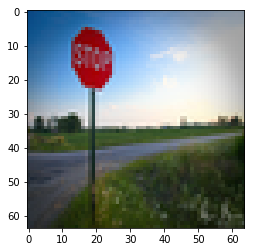

In [999]:
url = '/Users/sinanozdemir/Dropbox/CODE/personal_code/jwp08.jpg'
im = Image.open(url).resize(size_to_use, Image.ANTIALIAS)

imshow(im)

X = np.array(im)
X = X.reshape((1,) + X.shape)
to_predict = test_datagen.flow(X)
proba = model.predict_generator(to_predict, val_samples=1)

print proba

print code_to_target[proba.argmax()]

In [1000]:
X.shape

(1, 64, 64, 3)

In [1001]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function

layer_outs = functor([X, 1.])

In [1002]:
[l.shape for l in layer_outs]

[(1, 62, 62, 32),
 (1, 62, 62, 32),
 (1, 60, 60, 32),
 (1, 60, 60, 32),
 (1, 30, 30, 32),
 (1, 28, 28, 64),
 (1, 28, 28, 64),
 (1, 28, 28, 64),
 (1, 50176),
 (1, 512),
 (1, 512),
 (1, 512),
 (1, 4),
 (1, 4)]

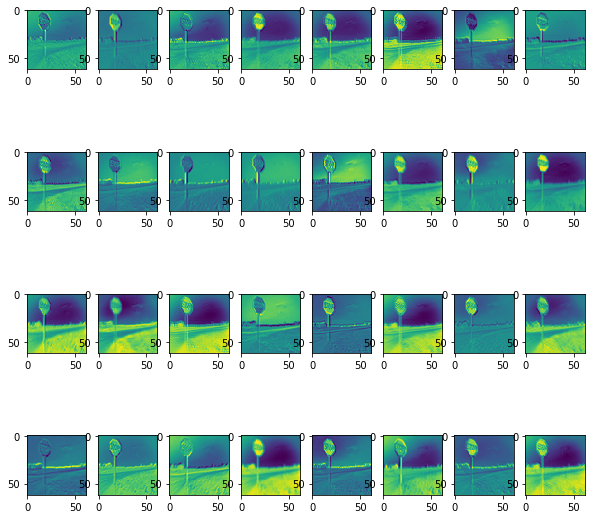

In [1003]:
num = 0
n_layer = layer_outs[num]
i, j = 0, 0
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 10))
features = np.split(n_layer, indices_or_sections=n_layer.shape[-1], axis=-1)
for feature in features:
    axes[i, j].imshow(feature.reshape(n_layer.shape[1], n_layer.shape[2]), )
    j+=1
    if j >= 8:
        j = 0
        i += 1

/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/sinanozdemir/Desktop/features/env/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `predict_generator` call to the Keras 2 API: `predict_generator(<keras.pre..., steps=1)`
  


[[  2.29809007e-08   9.99969125e-01   1.36827121e-05   1.71860902e-05]]
butterfly


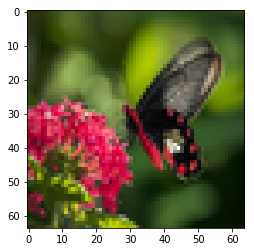

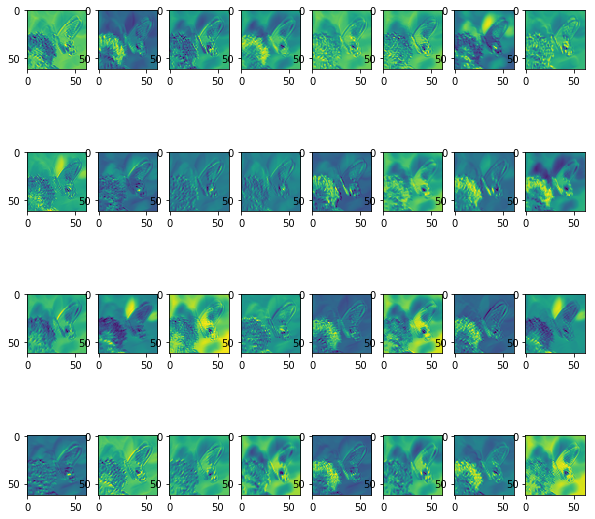

In [1004]:
url = '/Users/sinanozdemir/Dropbox/CODE/personal_code/butterfly.jpg'
im = Image.open(url).resize(size_to_use, Image.ANTIALIAS)
imshow(im)

X = np.array(im)
X = X.reshape((1,) + X.shape)
to_predict = test_datagen.flow(X)
proba = model.predict_generator(to_predict, val_samples=1)

print proba
print code_to_target[proba.argmax()]

layer_outs = functor([X, 1.])

num = 0
n_layer = layer_outs[num]
i, j = 0, 0
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 10))
features = np.split(n_layer, indices_or_sections=n_layer.shape[-1], axis=-1)
for feature in features:
    axes[i, j].imshow(feature.reshape(n_layer.shape[1], n_layer.shape[2]), )
    j+=1
    if j >= 8:
        j = 0
        i += 1

In [1006]:
# Pass random data through
test = np.random.random((64, 64, 3))[np.newaxis,...]
random_layer_outs = functor([test, 1.])

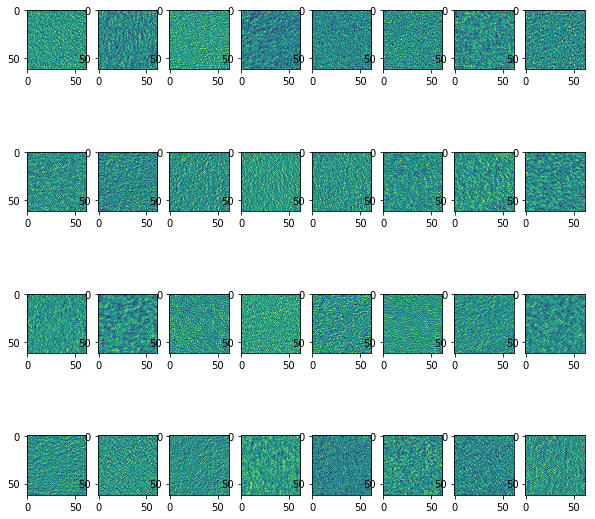

In [1007]:
num = 0
n_layer = random_layer_outs[num]
i, j = 0, 0
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10, 10))
features = np.split(n_layer, indices_or_sections=n_layer.shape[-1], axis=-1)
for feature in features:
    axes[i, j].imshow(feature.reshape(n_layer.shape[1], n_layer.shape[2]), )
    j+=1
    if j > 7:
        j = 0
        i += 1

In [1009]:
first_convolution_weights, first_convolution_biases = model.layers[0].get_weights()

In [1010]:
first_convolution_weights.shape  
# first two dimensions (3, 3) represent kernel size dimensions
# third dimension (3) represents the number of channels (rgb) for color images
    # if we were using grayscale images, this number would be 1
# final dimension (32) represents the number of convolution features to produce

(3, 3, 3, 32)

In [1011]:
first_convolution_biases.shape

(32,)

In [1012]:
kernels_per_feature = np.split(first_convolution_weights, indices_or_sections=32, axis=-1)

len(kernels_per_feature), type(kernels_per_feature)

(32, list)

In [1013]:
first_convolutional_feature = kernels_per_feature[0]

first_convolution_bias = first_convolution_biases[0]

first_convolutional_feature.shape, first_convolution_bias

((3, 3, 3, 1), 0.0009123896)

In [1014]:
# remove final axis
first_convolutional_feature = np.squeeze(first_convolutional_feature)

first_convolutional_feature.shape

(3, 3, 3)

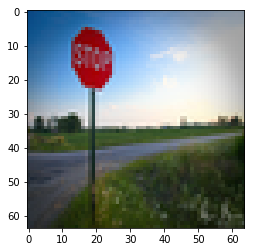

In [1015]:
im = Image.open('/Users/sinanozdemir/Dropbox/CODE/personal_code/jwp08.jpg').resize(size_to_use, Image.ANTIALIAS)

imshow(im)

X = np.array(im)/255.

# add a dimension to the beginning 
X = X.reshape((1,) + X.shape)

layer_outs = functor([X, 1.])

first_layer = layer_outs[0]
features = np.split(first_layer, indices_or_sections=first_layer.shape[-1], axis=-1)

In [1016]:
# get list of kernels per channel 
first_feature_channel_kernels = np.split(first_convolutional_feature, indices_or_sections=3, axis=-1)

first_feature_channel_kernels
# 3 matricies of shape 3x3
# one 3x3 kernel for each channel of the image

[array([[[-0.00880919],
         [-0.06047796],
         [ 0.08106115]],
 
        [[-0.0418453 ],
         [ 0.01380564],
         [-0.05567098]],
 
        [[-0.09530724],
         [-0.15624586],
         [ 0.06439677]]], dtype=float32), array([[[ 0.05294062],
         [ 0.11304489],
         [-0.1219229 ]],
 
        [[ 0.08393324],
         [ 0.05205895],
         [ 0.05471122]],
 
        [[-0.14451338],
         [-0.02132968],
         [ 0.06142727]]], dtype=float32), array([[[-0.04336838],
         [-0.03586755],
         [-0.07349026]],
 
        [[-0.03025393],
         [ 0.10945864],
         [-0.09552892]],
 
        [[-0.09561032],
         [ 0.0942756 ],
         [ 0.12333632]]], dtype=float32)]

In [1017]:
new_X = np.squeeze(X.sum(axis=3))/3.

In [1018]:
# get first channel of the image
first_X_channel = np.squeeze(X[:,:,:,0])
second_X_channel = np.squeeze(X[:,:,:,1])
third_X_channel = np.squeeze(X[:,:,:,2])

In [1019]:
first_X_channel.shape

(64, 64)

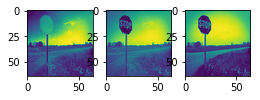

In [1020]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(4, 4))

axes[0].imshow(first_X_channel)
axes[1].imshow(second_X_channel)
axes[2].imshow(third_X_channel)

In [1021]:
# get the first channel kernal
first_channel_kernel = first_feature_channel_kernels[0]

first_feature_channel_kernels

[array([[[-0.00880919],
         [-0.06047796],
         [ 0.08106115]],
 
        [[-0.0418453 ],
         [ 0.01380564],
         [-0.05567098]],
 
        [[-0.09530724],
         [-0.15624586],
         [ 0.06439677]]], dtype=float32), array([[[ 0.05294062],
         [ 0.11304489],
         [-0.1219229 ]],
 
        [[ 0.08393324],
         [ 0.05205895],
         [ 0.05471122]],
 
        [[-0.14451338],
         [-0.02132968],
         [ 0.06142727]]], dtype=float32), array([[[-0.04336838],
         [-0.03586755],
         [-0.07349026]],
 
        [[-0.03025393],
         [ 0.10945864],
         [-0.09552892]],
 
        [[-0.09561032],
         [ 0.0942756 ],
         [ 0.12333632]]], dtype=float32)]

In [1022]:
new_X.shape

(64, 64)

In [1023]:
first_channel_kernel

array([[[-0.00880919],
        [-0.06047796],
        [ 0.08106115]],

       [[-0.0418453 ],
        [ 0.01380564],
        [-0.05567098]],

       [[-0.09530724],
        [-0.15624586],
        [ 0.06439677]]], dtype=float32)

In [1024]:
print np.multiply(first_channel_kernel, new_X[:3,:3]).sum()

-0.216206890739


In [1025]:
# for each channel in the image
channel_kernel_outputs = []
for channel in range(3):
    # calculate the 0,0 index first
    channel_kernel_outputs.append( np.multiply(np.squeeze(first_feature_channel_kernels[channel]), 
                                               np.squeeze(X[:,:,:,channel])[:3,:3]).sum() )    
channel_kernel_outputs

[-0.0056965516880154599, 0.035930808392517694, -0.020941499533022156]

In [1026]:
sum(channel_kernel_outputs) + first_convolution_bias

0.010205146773060877

In [1027]:
# for each channel in the image
channel_kernel_outputs = []
for channel in range(3):
    # calculate the 0,1 index first
    channel_kernel_outputs.append( np.multiply(np.squeeze(first_feature_channel_kernels[channel]), 
                                               np.squeeze(X[:,:,:,channel])[:3,1:4]).sum() )    
channel_kernel_outputs

[-0.012017391505194645, 0.038116798769025254, -0.022551079196672805]

In [1028]:
sum(channel_kernel_outputs) + first_convolution_bias

0.0044607176687386021

array([[ 0.01020515,  0.00446072,  0.00442693],
       [ 0.00629897,  0.00474462,  0.00486653],
       [ 0.00787856,  0.00397837,  0.00515751]], dtype=float32)

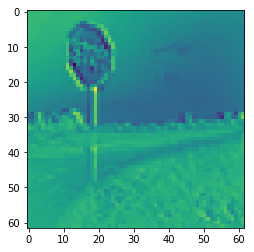

In [1029]:
plt.imshow(np.squeeze(features[0]))

np.squeeze(features[0])[:3,:3]

In [54]:
import logging
 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from gensim.models import word2vec, Word2Vec

sentences = word2vec.Text8Corpus('../data/text8')

In [55]:
# instantiate a gensim module on the sentences from above
# min_count allows us to ignore words that occur strictly less than this value
# size is the dimension of words we wish to learn
model = Word2Vec(sentences, min_count=1, size=20)

2017-12-29 18:01:45,878 : INFO : collecting all words and their counts
2017-12-29 18:01:45,886 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


KeyboardInterrupt: 

In [56]:
# get the vectorization of a word
model.wv['king']

array([-0.48768288,  0.66667134,  2.33743191,  2.71835423,  4.17330408,
        2.30985498,  1.92848825,  1.43448424,  3.91518641, -0.01281452,
        3.82612252,  0.60087812,  6.15167284,  4.70150518, -1.65476751,
        4.85853577,  3.45778084,  5.02583361, -2.98040175,  2.37563372], dtype=float32)

In [57]:
# woman + king - man = queen
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)

[(u'emperor', 0.8988120555877686),
 (u'prince', 0.87584388256073),
 (u'consul', 0.8575721979141235),
 (u'tsar', 0.8558996319770813),
 (u'constantine', 0.8515684604644775),
 (u'pope', 0.8496872782707214),
 (u'throne', 0.8495982885360718),
 (u'elector', 0.8379884362220764),
 (u'judah', 0.8376096487045288),
 (u'emperors', 0.8356839418411255)]

In [58]:
# London is to England as Paris is to ____
model.wv.most_similar(positive=['Paris', 'England'], negative=['London'], topn=1)

KeyError: "word 'Paris' not in vocabulary"

In [59]:
vectors = []        # positions in vector space
labels = []         # keep track of words to label our data again later
for word in model.wv.vocab:
    vectors.append(model.wv[word])
    labels.append(word)

# convert both lists into numpy vectors for reduction
vectors = np.asarray(vectors)
labels = np.asarray(labels)

In [60]:
vectors = np.asarray(vectors)
pca = PCA(n_components=2)
vectors = pca.fit_transform(vectors)

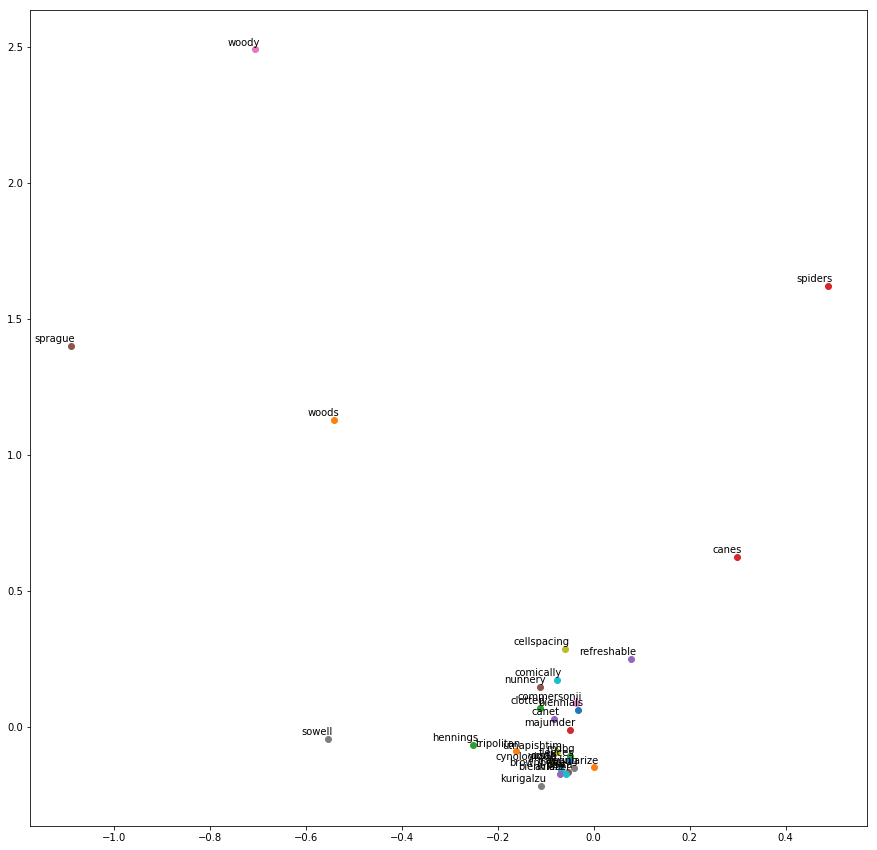

In [61]:
# set plot size
plt.figure(figsize=(15, 15))
# loop through all labels
for i, label in enumerate(labels[:30]):
    # get the embedding vectors
    x, y = vectors[i, :]
    # plot them in a scatterplot
    plt.scatter(x, y)
    # annotations
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

In [63]:
# use a pretrained vocabulary with 3,000,000 words

import gensim

model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)

2017-12-29 18:02:00,022 : INFO : loading projection weights from ../data/GoogleNews-vectors-negative300.bin
2017-12-29 18:03:05,363 : INFO : loaded (3000000, 300) matrix from ../data/GoogleNews-vectors-negative300.bin


In [64]:
len(model.wv.vocab)

3000000

In [187]:
# woman + king - man = queen
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[(u'queen', 0.7118192911148071)]

In [188]:
# London is to England as Paris is to ____
model.wv.most_similar(positive=['Paris', 'England'], negative=['London'], topn=1)

[(u'France', 0.6676377654075623)]

In [189]:
# Pick out the oddball word in a sentenve
model.wv.doesnt_match("duck bear cat tree".split())

'tree'

In [190]:
# grab a similarity score between 0 and 1
model.wv.similarity('woman', 'man')

0.76640122309953518

In [191]:
model.wv.similarity('tree', 'man')

0.22937458713940156

In [65]:
# helper function to try to grab embeddings for a word and returns None if that word is not found
def get_embedding(string):
    try:
        return model.wv[string]
    except:
        return None

In [93]:
sentences = [
    "this is about a dog",
    "this is about a cat",
    "this is about nothing"
]

In [94]:
# Zero matrix of shape (3,300)
vectorized_sentences = np.zeros((len(sentences),300))
# for every sentence
for i, sentence in enumerate(sentences):
    # tokenize sentence into words
    words = sentence.split(' ')
    # embed whichever words that we can
    embedded_words = [get_embedding(w) for w in words]
    embedded_words = filter(lambda x:x is not None, embedded_words)
    # Take a mean of the vectors, to get an estimate vectorization of the entire title
    vectorized_sentence = reduce(lambda x,y:x+y, embedded_words)/len(embedded_words)
    # change the ith row (in place) to be the ith vectorization
    vectorized_sentences[i:] = vectorized_sentence

In [95]:
vectorized_sentences.shape

(3, 300)

In [96]:
# we want articles most similar to the reference word "dog"
reference_word = 'dog'

# take a dot product between the embedding of dof and our vectorized matrix
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

# output the most relevant sentence
sentences[best_sentence_idx]

'this is about a dog'

In [97]:
reference_word = 'cat'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

sentences[best_sentence_idx]

'this is about a cat'

In [98]:
reference_word = 'canine'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

sentences[best_sentence_idx]

'this is about a dog'

In [99]:
reference_word = 'tiger'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-1]

sentences[best_sentence_idx]

'this is about a cat'

In [88]:
# Chapter titles from Sinan's first book, "The Principles of Data Science

sentences = """How to Sound Like a Data Scientist
Types of Data
The Five Steps of Data Science 
Basic Mathematics
A Gentle Introduction to Probability
Advanced Probability 
Basic Statistics
Advanced Statistics
Communicating Data 
Machine Learning Essentials
Beyond the Essentials
Case Studies """.split('\n')

In [89]:
vectorized_sentences = np.zeros((len(sentences),300))
for i, sentence in enumerate(sentences):
    words = sentence.split(' ')
    embedded_words = [get_embedding(w) for w in words if get_embedding(w) is not None]
    vectorized_sentence = reduce(lambda x,y:x+y, embedded_words)/len(embedded_words)
    vectorized_sentences[i:] = vectorized_sentence

In [90]:
# find chapters about math
reference_word = 'math'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]

[sentences[b] for b in best_sentence_idx]

['Basic Mathematics', 'Basic Statistics', 'Advanced Probability ']

In [91]:
# which chapters are about giving talks about data
reference_word = 'talk'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]

[sentences[b] for b in best_sentence_idx]

['Communicating Data ', 'How to Sound Like a Data Scientist', 'Case Studies ']

In [92]:
# which chapters are about AI
reference_word = 'AI'
best_sentence_idx = np.dot(vectorized_sentences, get_embedding(reference_word)).argsort()[-3:][::-1]

[sentences[b] for b in best_sentence_idx]

['Advanced Probability ', 'Advanced Statistics', 'Machine Learning Essentials']